### ✅ **2. Jupyter Notebook — TD : Classification sur Breast Cancer Dataset**

**Objectifs :**
- Comprendre la classification supervisée  
- Tester 4 modèles : Logistic Regression, Decision Tree, Random Forest, KNN  
- Visualiser matrice de confusion & métriques  
- Répondre à des questions intermédiaires


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
# -------------------------------
# 1. Chargement du dataset
# -------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape X :", X.shape)
print("Labels :", data.target_names)


Shape X : (569, 30)
Labels : ['malignant' 'benign']


In [5]:
# 2. Train / Test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


In [6]:
# -------------------------------
# 3. Standardisation
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [7]:
# -------------------------------
# 4. Modèles à tester
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "KNN": KNeighborsClassifier(n_neighbors=7)
}
results = {}

Logistic Regression
Accuracy : 0.9883040935672515
Matrice de confusion :
 [[ 63   1]
 [  1 106]]
Classification Report :
               precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



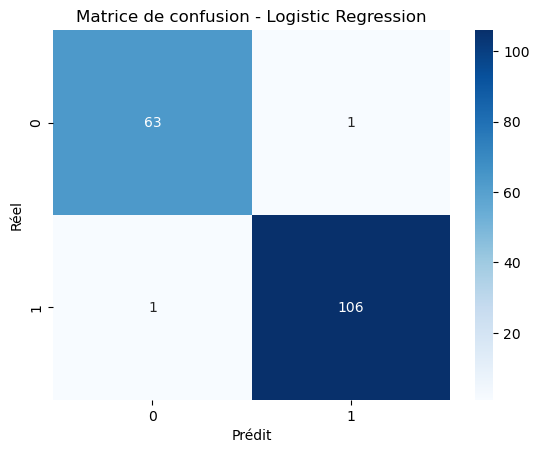

Decision Tree
Accuracy : 0.9298245614035088
Matrice de confusion :
 [[ 58   6]
 [  6 101]]
Classification Report :
               precision    recall  f1-score   support

   malignant       0.91      0.91      0.91        64
      benign       0.94      0.94      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



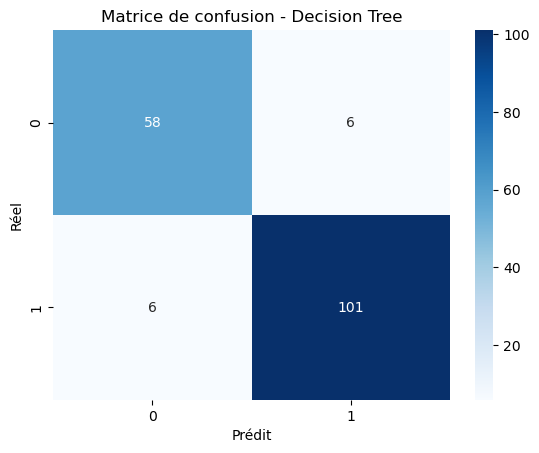

Random Forest
Accuracy : 0.9415204678362573
Matrice de confusion :
 [[ 58   6]
 [  4 103]]
Classification Report :
               precision    recall  f1-score   support

   malignant       0.94      0.91      0.92        64
      benign       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



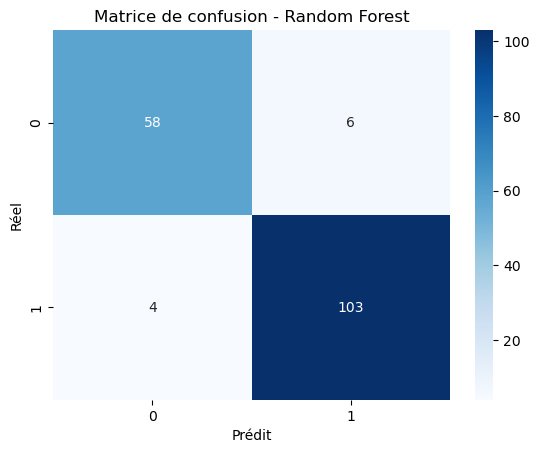

KNN
Accuracy : 0.9649122807017544
Matrice de confusion :
 [[ 58   6]
 [  0 107]]
Classification Report :
               precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        64
      benign       0.95      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



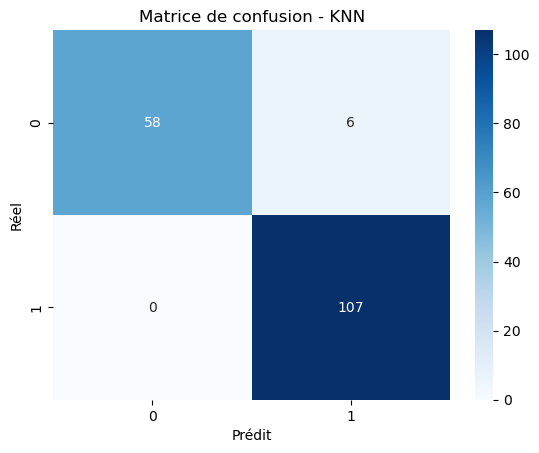

In [ ]:
# 5. Entraînement & Évaluation
# -------------------------------
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    preds = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, preds)
    
    cm = confusion_matrix(y_test, preds)
    report = classification_report(y_test, preds, target_names=data.target_names)

    results[name] = (acc, cm, report)

    print("=" * 60)
    print(name)
    print("Accuracy :", acc)
    print("Matrice de confusion :\n", cm)
    print("Classification Report :\n", report)

    # heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()

### QUESTIONS & UPGRADE


1️⃣ Quel modèle obtient la meilleure accuracy ? Pourquoi selon vous ?

2️⃣ Compare le rappel (Recall) pour la classe “malignant”. 
    → Quel modèle détecte le mieux les cancers ?

3️⃣ Compare la précision (Precision) pour la même classe.
    → Quel modèle limite le plus les faux positifs ?

4️⃣ Pour le Decision Tree : 
    → Que se passe-t-il si on enlève la limite max_depth=5 ?

5️⃣ Pour KNN :
    → Comment varie la performance si on teste k = 1, 3, 5, 15 ?

6️⃣ Quelle métrique serait la plus importante dans un cas médical réel ?
    • Précision ?
    • Rappel ?
    • F1-score ?
    Justifie.

7️⃣ Propose une pipeline améliorée (choix des features, normalisation, cross-validation).
